<a href="https://colab.research.google.com/github/aayushhiii/IPL_game_ML/blob/main/Ml_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Following is the various visualisation on ML IPL data and the prediction which team will win by training the model.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt #for visualization
import seaborn as sns  #for high level visualization
mlt.style.use('fivethirtyeight')  
import plotly.offline as py  #for various graphs
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
from google.colab import files    #for importing files from local system
data = files.upload()

Saving IPL Ball-by-Ball 2008-2020.csv to IPL Ball-by-Ball 2008-2020 (1).csv
Saving IPL Matches 2008-2020.csv to IPL Matches 2008-2020.csv


In [ ]:
import io

In [ ]:
ball=pd.read_csv(io.BytesIO(data['IPL Ball-by-Ball 2008-2020.csv']))  #reading ball data
matches =pd.read_csv(io.BytesIO(data['IPL Matches 2008-2020.csv']))   #reading matches data

In [ ]:
ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
bowl_ext=ball.groupby(['bowler'])["extra_runs"].count().reset_index().sort_values(by="extra_runs",ascending=False).reset_index(drop=True) #grouping by bowler and runs who scored max
bowl_extra=bowl_ext.iloc[:,:]
bowl_extra

,bowler,extra_runs
0,Harbhajan Singh,3451
1,R Ashwin,3327
2,PP Chawla,3285
3,A Mishra,3233
4,SL Malinga,2974
...,...,...
415,LS Livingstone,6
416,DA Warner,2
417,SPD Smith,2
418,SN Khan,2


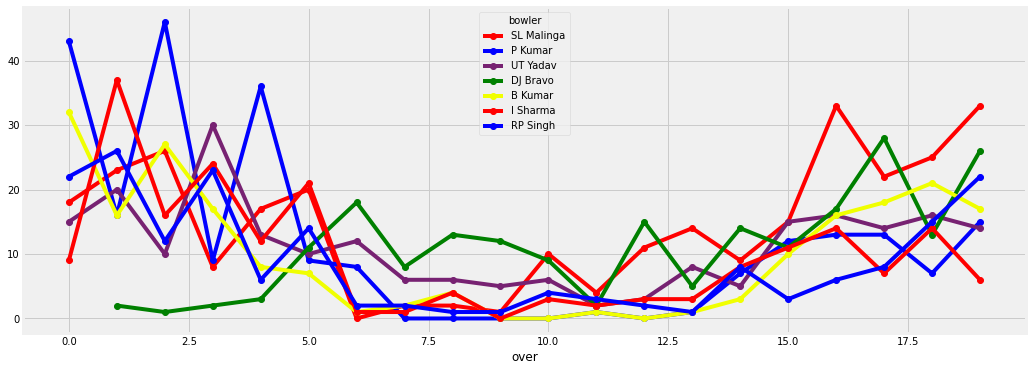

In [ ]:
a=ball.groupby(['over','bowler'])['extra_runs'].sum().reset_index() #grouping over and bowler_names and total extra score scored by them
a=a.groupby(['over','bowler'])['extra_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)   #storing in index total
a=a.sort_values(by='Total',ascending=0)[:7]  #sorting by total runs , displaying only 7 bowlers
a.drop('Total',axis=1,inplace=True)  #since all the values are NaN
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')  #marking color
fig=mlt.gcf()    
fig.set_size_inches(16,6)
mlt.show()  #displaying plot

#here I am displaying bowlers’ vs extras given by them in each over.



<function matplotlib.pyplot.show>

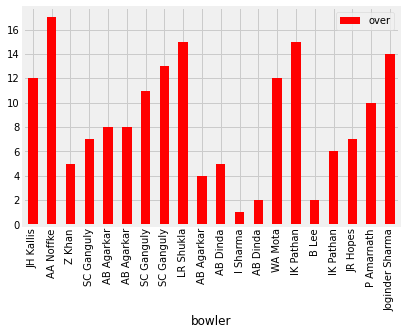

In [ ]:
a=ball.loc[ball['is_wicket']==1]  #data of only those who took wicket
a.iloc[:20,:].plot(kind='bar',x='bowler',y='over',color='red')  # plotting bar plot

mlt.show

#here I am displaying bowlers’ who took wickets vs the over number in which they took it.

<function matplotlib.pyplot.show>

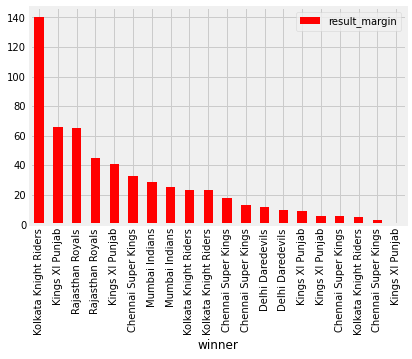

In [ ]:
a=matches.loc[matches['result']=='runs']  #sorting data who won the match by runs.
a.iloc[:20,:].sort_values(by="result_margin",ascending=False).plot(kind='bar',x='winner',y='result_margin',color='red') #sorting data with max margins in descending order
mlt.show

# Here I am displaying graph of Team names who won match with max margin (in decreasing order) vs the runs (margin).

In [ ]:
from sklearn.model_selection import train_test_split  #for predictive data analysis
from sklearn import preprocessing

In [ ]:
from sklearn.linear_model import LinearRegression  #algorithm for model fitting
regressor = LinearRegression()
le = preprocessing.LabelEncoder()  #preprocessing encoder to convert in categorical values


In [ ]:
matches["team1"]=le.fit_transform(matches["team1"])  #converting in categorical values as string can't be fitted and predicted in models
matches["team2"]=le.fit_transform(matches["team2"])
matches["winner"]=le.fit_transform(matches["winner"].astype(str))

In [ ]:
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1 #extracting dataframe in which winner name matches team1 name and assigning team1_win as 1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0  #extracting dataframe in which winner does name matches team1 name and assigning team1_win as 0

In [ ]:
prediction_df=matches[["team1","team2","team1_win"]] #storing extracted data in prediction_df

In [ ]:
correlated_features = set()  #creating set
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()  

In [ ]:
#finding pairwise correlation of columns in dataframe ( teams name and winners name with team1_win  )
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_win
0,13,7,0.0
1,5,0,0.0
2,3,10,1.0
3,8,13,0.0
4,7,1,1.0
...,...,...,...
811,13,8,1.0
812,8,2,1.0
813,13,14,0.0
814,2,14,1.0


In [ ]:
X = prediction_df.iloc[:, 0:2]  #storing team 1 and team 2 in X for input training model
X

,team1,team2
0,13,7
1,5,0
2,3,10
3,8,13
4,7,1
...,...,...
811,13,8
812,8,2
813,13,14
814,2,14


In [ ]:
y=prediction_df.iloc[:,2:3]  #storing team1_win in y for prediction
y

,team1_win
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
811,1.0
812,1.0
813,0.0
814,1.0


In [ ]:
y = prediction_df['team1_win']
X = prediction_df.drop(['team1_win'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True) #splitting train test model


In [ ]:
import sklearn.linear_model as sk  #sklearn that contains various libraries for algorithms 
from sklearn.linear_model import LogisticRegression  #algorithm that predicts the probability of a categorical dependent variable
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  #fitting training model
y_pred = logreg.predict(X_test)  #predicting test data
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))  #finding accuracy of test data


Accuracy of Logistic Regression Classifier on test set: 0.5244


In [ ]:
#Decision Tree Classifier
from sklearn import tree   #algorithm for prediction of both continuous and discrete values
dtree = tree.DecisionTreeClassifier()
#dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on test set: 0.5122


In [ ]:
#SVM
from sklearn.svm import SVC  #algorithm that is most commonly used for solving classification problems
#svc = SVC()
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM Classifier on test set: 0.5366


In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier   #another algorithm that performs both regression and classification tasks 
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Accuracy of Random Forest Classifier on test set: 0.5244


In [ ]:
matches["eliminator"]=le.fit_transform(matches["eliminator"].astype(str))  #converting eliminator data to categorical values
matches["eliminator"]

0      0
1      0
2      0
3      0
4      0
      ..
811    1
812    0
813    0
814    0
815    0
Name: eliminator, Length: 816, dtype: int64

In [ ]:
ele=matches.loc[matches['eliminator']==1]  #extracting only eliminator data and storing in ele
ele


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,team1_win
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,7,10,Kolkata Knight Riders,field,10,tie,NaN,1,NaN,MR Benson,M Erasmus,0.0
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,0,5,Chennai Super Kings,field,5,tie,NaN,1,NaN,K Hariharan,DJ Harper,0.0
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,14,13,Royal Challengers Bangalore,bat,14,tie,NaN,1,NaN,AK Chaudhary,S Ravi,1.0
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,13,3,Royal Challengers Bangalore,field,13,tie,NaN,1,NaN,M Erasmus,VA Kulkarni,1.0
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,7,10,Rajasthan Royals,bat,10,tie,NaN,1,NaN,Aleem Dar,AK Chaudhary,0.0
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,10,5,Kings XI Punjab,field,5,tie,NaN,1,NaN,M Erasmus,S Ravi,0.0
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,4,8,Gujarat Lions,bat,8,tie,NaN,1,NaN,AK Chaudhary,CB Gaffaney,0.0
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,2,7,Delhi Capitals,field,2,tie,NaN,1,NaN,AY Dandekar,Nitin Menon,1.0
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,8,14,Mumbai Indians,bat,8,tie,NaN,1,NaN,CK Nandan,S Ravi,1.0
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,2,5,Kings XI Punjab,field,2,tie,NaN,1,NaN,AK Chaudhary,Nitin Menon,1.0


In [ ]:
ele.loc[(ele["winner"]==ele["team1"]), "team1_wins"]=1  #extracting data where team1 name matches winner team1_wins displays 1
ele.loc[(ele["winner"]!=ele["team1"]) ,"team1_wins"]=0  #extracting data where team1 name does not matches winner team1_wins displays 0



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
predictions_df=ele[["team1","team2","team1_wins"]]  #storing in predictions_df

In [ ]:
correlated_features = set()
correlation_matrix = predictions_df.drop('team1_wins', axis=1).corr()

In [ ]:
#finding pairwise correlation of columns in dataframe ( teams name and winners name with team1_wins  )
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
predictions_df.drop(columns=correlated_features)

,team1,team2,team1_wins
66,7,10,0.0
130,0,5,0.0
328,14,13,1.0
341,13,3,1.0
416,7,10,0.0
476,10,5,0.0
610,4,8,0.0
705,2,7,1.0
746,8,14,1.0
757,2,5,1.0
